In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Zadanie 1

In [2]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

width = 9
height = 6
square_size = 0.025

objp = np.zeros((height * width, 1, 3), np.float64)
objp[:, 0, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

objp = objp + square_size

objpoints = []
imgpoints = []

img_width = 640
img_height = 480
image_size = (img_width, img_height)

path = ""
image_dir = path + "pairs/"

number_of_images = 50
for i in range(1, number_of_images):
    new_path = (image_dir + "left_%02d.png" % i)
    img = cv2.imread(new_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    Y, X, channels = img.shape

    if (ret == True):
        minRx = corners[:,:,0].min()
        maxRx = corners[:,:,0].max()
        minRy = corners[:,:,1].min()
        maxRy = corners[:,:,1].max()

        border_threshold_x = X/12
        border_threshold_y = Y/12

        x_thresh_bad = False
        if (minRx < border_threshold_x):
            x_thresh_bad = True
        
        y_thresh_bad = False
        if(minRy < border_threshold_y):
            y_thresh_bad = True

        if(y_thresh_bad==True) or (x_thresh_bad==True):
            continue
    
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray, corners, (3, 3), (-1, -1), criteria)

        imgpoints.append(corners2)

        cv2.drawChessboardCorners(img, (width, height), corners2, ret)
        cv2.imshow("Corners", img)
        cv2.waitKey(100)
    else:
        print("Chessboard couldn't be detected. Image pair: {}".format(i))
        continue
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [3]:
N_OK = len(objpoints)
K = np.zeros((3,3))
D = np.zeros((4,1))
rvecs = [np.zeros((1,1,3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1,1,3), dtype=np.float64) for i in range(N_OK)]

ret, K, D, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        image_size,
        K,
        D,
        rvecs,
        tvecs,
        calibration_flags,
        (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, image_size, cv2.CV_16SC2)

/tmp/ipykernel_7677/3693362458.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


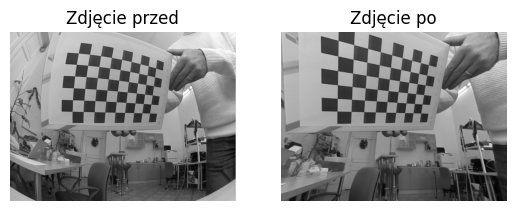

In [4]:
I = cv2.imread("pairs/left_23.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

undistorted_image = cv2.remap(I, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

fig, ax = plt.subplots(1,2)
ax[0].imshow(I, cmap='gray')
ax[0].axis("off")
ax[0].set_title("Zdjęcie przed")
ax[1].imshow(undistorted_image, cmap='gray')
ax[1].axis("off")
ax[1].set_title("Zdjęcie po")
fig.show()

## Zadanie 2

In [101]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW

width = 9
heigth = 6
square_size = 0.025

objp = np.zeros((heigth * width, 1, 3), np.float64)
objp[:, 0, :2] = np.mgrid[0:width, 0:heigth].T.reshape(-1, 2)

objp = objp * square_size

objpoints = []
imgpoints_left = []
imgpoints_right = []

path = ""
image_dir = path + "pairs"

number_of_images = 50
for i in range(1, number_of_images):
    left_path = (image_dir + "/left_%02d.png" % i)
    img_left = cv2.imread(left_path)
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

    right_path = (image_dir + "/right_%02d.png" % i)
    img_right = cv2.imread(right_path)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

    ret_left, corners_left = cv2.findChessboardCorners(gray_left, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    ret_right, corners_right = cv2.findChessboardCorners(gray_right, (width, height), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret_left and ret_right:
        objpoints.append(objp)

        corners2_left = cv2.cornerSubPix(gray_left, corners_left, (3, 3), (-1, -1), criteria)
        imgpoints_left.append(corners2_left)
        corners2_right = cv2.cornerSubPix(gray_right, corners_right, (3, 3), (-1, -1), criteria)
        imgpoints_right.append(corners2_right)

        cv2.drawChessboardCorners(img_left, (width, height), corners2_left, ret_left)
        cv2.drawChessboardCorners(img_right, (width, height), corners2_right, ret_right)

        cv2.imshow('corners_left', img_left)
        cv2.imshow('corners_right', img_right)
        cv2.waitKey(100)
cv2.destroyAllWindows()

In [102]:
N_OK = len(objpoints)
K_left = np.zeros((3, 3))
D_left = np.zeros((4, 1))
K_right = np.zeros((3, 3))
D_right = np.zeros((4, 1))
rvecs_left = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rvecs_right = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs_left = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs_right = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]

ret_left, K_left, D_left, _, _ = cv2.fisheye.calibrate(objpoints, imgpoints_left, (img_width, img_height), K_left, D_left, rvecs_left, tvecs_left, calibration_flags, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))

ret_right, K_right, D_right, _, _ = cv2.fisheye.calibrate(objpoints, imgpoints_right, (img_width, img_height), K_right, D_right, rvecs_right, tvecs_right, calibration_flags, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))

map1_right, map2_right = cv2.fisheye.initUndistortRectifyMap(K_right, D_right, np.eye(3), K_right, (img_width, img_height), cv2.CV_16SC2)
map1_left, map2_left = cv2.fisheye.initUndistortRectifyMap(K_left, D_left, np.eye(3), K_left, (img_width, img_height), cv2.CV_16SC2)

In [7]:
imgpoints_left = np.asarray(imgpoints_left, dtype=np.float64)
imgpoints_right = np.asarray(imgpoints_right, dtype=np.float64)

RMS, _, _, _, _, rotation_matrix, translation_vector = cv2.fisheye.stereoCalibrate(objpoints, 
                                                                                   imgpoints_left, imgpoints_right, 
                                                                                   K_left, D_left, K_right, D_right, 
                                                                                   (img_width, img_height), None, None, cv2.CALIB_FIX_INTRINSIC, criteria)

In [108]:
R2 = np.zeros((3, 3))
P1 = np.zeros((3, 4))
P2 = np.zeros((3, 4))
Q = np.zeros((4, 4))

left_rectification, right_rectification, left_projection, right_projection, dispartity_to_depth_map = cv2.fisheye.stereoRectify(K_left, D_left, 
                                                                                                                                K_right, D_right, 
                                                                                                                                (img_width, img_height), 
                                                                                                                                rotation_matrix, translation_vector, 
                                                                                                                                0, R2, P1, P2, Q, cv2.CALIB_ZERO_DISPARITY, (0, 0),0 ,0)

map1_left, map2_left = cv2.fisheye.initUndistortRectifyMap(K_left, D_left, left_rectification, left_projection, (img_width, img_height), cv2.CV_16SC2)

map1_right, map2_right = cv2.fisheye.initUndistortRectifyMap(K_right, D_right, right_rectification, right_projection, (img_width, img_height), cv2.CV_16SC2)

In [18]:
dst_left = cv2.remap(img_left, map1_left, map2_left, interpolation=cv2.INTER_LINEAR)
dst_right = cv2.remap(img_right, map1_right, map2_right, interpolation=cv2.INTER_LINEAR)

In [19]:
N, XX, YY = dst_left.shape[::-1]

visRectify = np.zeros((YY, XX * 2, 3), np.uint8)
visRectify[:, :XX, :] = dst_left
visRectify[:, XX:, :] = dst_right

for y in range(0, YY, 10):
    cv2.line(visRectify, (0, y), (2 * XX, y), (255, 0, 0))

cv2.imshow('visRectify', visRectify)
cv2.waitKey(5000)
cv2.destroyAllWindows()

## Zadanie 3

In [21]:
num = 29

In [135]:
stereo = cv2.StereoBM_create(numDisparities=112, blockSize=15)
img_r_new = cv2.imread(image_dir +"/right_%02d.png"%num, 0)
img_l_new = cv2.imread(image_dir +"/left_%02d.png"%num, 0)
disparity = stereo.compute(img_l_new, img_r_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_16U)
disparity_no_calib_BM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

In [115]:
stereo = cv2.StereoSGBM_create(minDisparity=16,numDisparities=80, blockSize=17)
img_r_new = cv2.imread(image_dir +"/right_%02d.png"%num, 0)
img_l_new = cv2.imread(image_dir +"/left_%02d.png"%num, 0)
disparity = stereo.compute(img_l_new, img_r_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_no_calib_SGM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

In [133]:
stereo = cv2.StereoBM_create(numDisparities=112, blockSize=15)
img_r = cv2.imread(image_dir +"/right_%02d.png"%num, 0)
img_l = cv2.imread(image_dir +"/left_%02d.png"%num, 0)
img_l_new = cv2 . remap ( img_l , map1_left , map2_left , cv2 . INTER_LINEAR )
img_r_new = cv2 . remap ( img_r , map1_right , map2_right , cv2 . INTER_LINEAR )
disparity = stereo.compute(img_l_new, img_r_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_16U)
disparity_calib_BM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

In [119]:
stereo = cv2.StereoSGBM_create(minDisparity=16,numDisparities=80, blockSize=17)
img_r = cv2.imread(image_dir +"/right_%02d.png"%num, 0)
img_l = cv2.imread(image_dir +"/left_%02d.png"%num, 0)
img_l_new = cv2 . remap ( img_l , map1_left , map2_left , cv2 . INTER_LINEAR )
img_r_new = cv2 . remap ( img_r , map1_right , map2_right , cv2 . INTER_LINEAR )
disparity = stereo.compute(img_l_new, img_r_new)
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_calib_SGM = disparity#cv2.applyColorMap(disparity, cv2.COLORMAP_HOT)

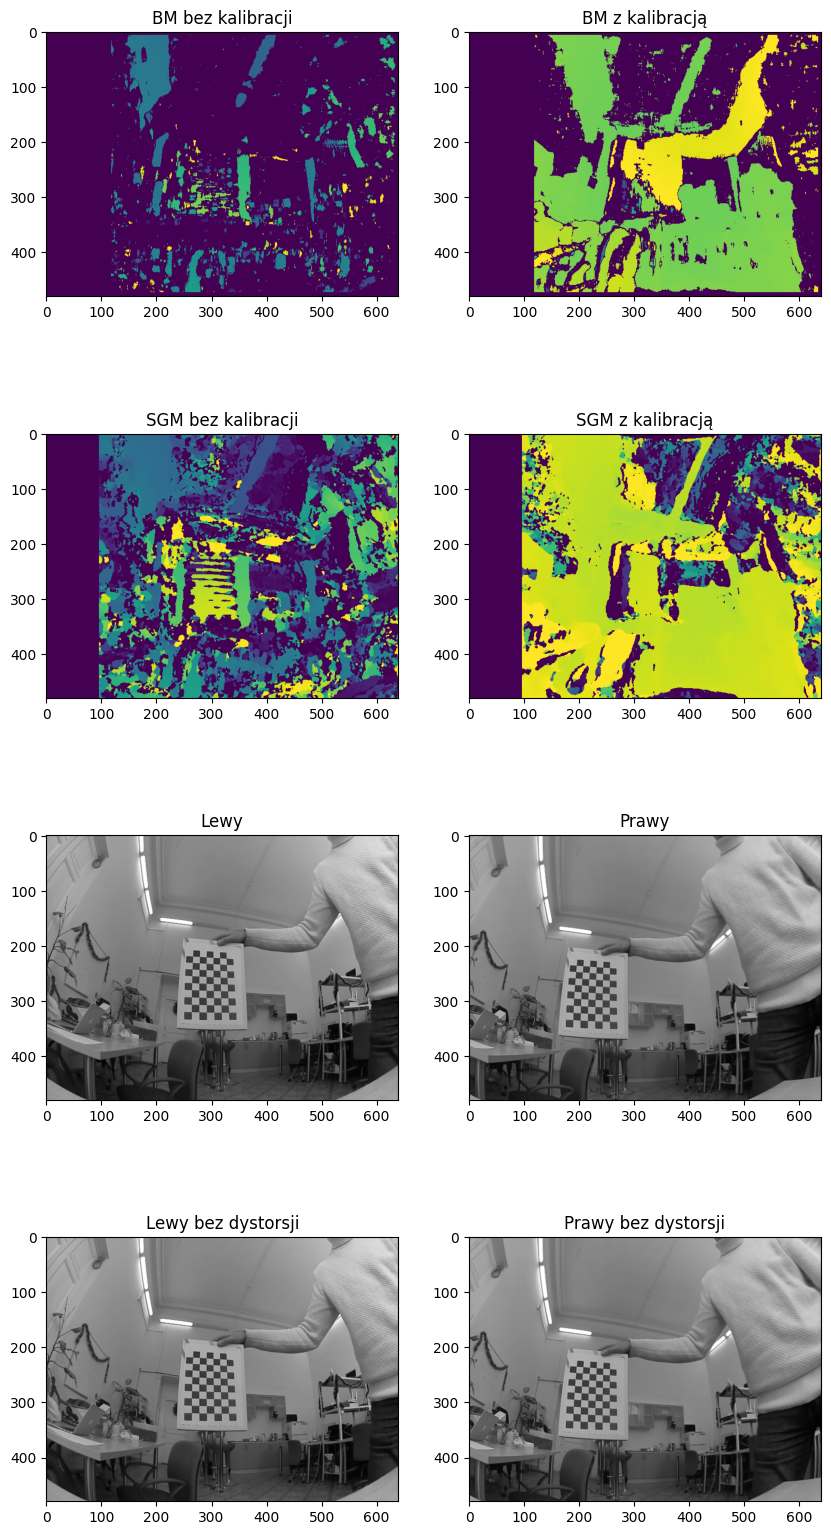

In [136]:
import matplotlib.pyplot as plt



fig, axs = plt.subplots(4, 2, figsize=(10, 20))

axs[0,0].set_title('BM bez kalibracji')
axs[0,0].imshow(disparity_no_calib_BM)
axs[0,1].set_title('BM z kalibracją')
axs[0,1].imshow(disparity_calib_BM)
axs[1,0].set_title('SGM bez kalibracji')
axs[1,0].imshow(disparity_no_calib_SGM)
axs[1,1].set_title('SGM z kalibracją')
axs[1,1].imshow(disparity_calib_SGM)
axs[2,0].set_title('Lewy')
axs[2,0].imshow(img_l, cmap='gray')
axs[2,1].set_title('Prawy')
axs[2,1].imshow(img_r, cmap='gray')
axs[3,0].set_title('Lewy bez dystorsji')
axs[3,0].imshow(img_l_new, cmap='gray')
axs[3,1].set_title('Prawy bez dystorsji')
axs[3,1].imshow(img_r_new, cmap='gray')
plt.show()